In [1]:
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fits_catalog_filename = 'allStarLite-dr17-synspec_rev1.fits'

hdul = fits.open(fits_catalog_filename)

In [3]:
hdul.info()

Filename: allStarLite-dr17-synspec_rev1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       5   ()      
  1                1 BinTableHDU    399   733901R x 191C   [30A, 6A, 20A, 30A, D, D, D, D, E, E, E, E, E, E, E, 32A, E, E, J, J, J, J, J, J, 132A, 32A, 32A, J, E, E, K, 132A, K, 132A, E, E, E, E, E, E, E, E, E, E, E, J, J, E, E, E, E, E, E, K, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 8A, E, 9K, K, 256A, E, E, E, 27E, 27E, 27E, 27E, 27E, 27E, J, K, 10A, 27E, 27E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, J, E, E, E, J, E, E, E, J, E, E, E, J, E, E, E, J, E, E, E, J, E, E, E, J, E, E, E, J, E, E, E, J, E, E, E, J, E, E, E, J, E, E, E, J, E, E, E, J, E, E, E, J, E, E, E, J, E, E, E, J, E, E, E, J, E, E, E, J, E, E, E, J, E, E, E, J, E, E, E, J, E, E, E, J]   
  2                1 ImageHDU         6   (360,)   int64   
  3                1 BinTableHDU     26   1R x 6C   [7514E, 576A, 540A, 27J, 1296A, 420A]   
  4     

In [4]:
hdul[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2500 / length of dimension 1                          
NAXIS2  =               733901 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                  191 / number of table fields                         
TTYPE1  = 'APOGEE_ID'                                                           
TFORM1  = '30A     '                                                            
TTYPE2  = 'TELESCOPE'                                                           
TFORM2  = '6A      '                                                            
TTYPE3  = 'FIELD   '        

In [5]:
catdata = hdul[1].data
hdul.close()

In [6]:
catdata.field(0)

chararray(['VESTA', '2M00000002+7417074', '2M00000019-1924498', ...,
           '2M23595921+5609479', '2M23595949-7342592',
           '2M23595980+1528407'], dtype='<U30')

In [7]:
catdata.dtype.fields

mappingproxy({'APOGEE_ID': (dtype('S30'), 0),
              'TELESCOPE': (dtype('S6'), 30),
              'FIELD': (dtype('S20'), 36),
              'ALT_ID': (dtype('S30'), 56),
              'RA': (dtype('>f8'), 86),
              'DEC': (dtype('>f8'), 94),
              'GLON': (dtype('>f8'), 102),
              'GLAT': (dtype('>f8'), 110),
              'J': (dtype('>f4'), 118),
              'J_ERR': (dtype('>f4'), 122),
              'H': (dtype('>f4'), 126),
              'H_ERR': (dtype('>f4'), 130),
              'K': (dtype('>f4'), 134),
              'K_ERR': (dtype('>f4'), 138),
              'AK_TARG': (dtype('>f4'), 142),
              'AK_TARG_METHOD': (dtype('S32'), 146),
              'AK_WISE': (dtype('>f4'), 178),
              'SFD_EBV': (dtype('>f4'), 182),
              'APOGEE_TARGET1': (dtype('>i4'), 186),
              'APOGEE_TARGET2': (dtype('>i4'), 190),
              'APOGEE2_TARGET1': (dtype('>i4'), 194),
              'APOGEE2_TARGET2': (dtype('>i4'), 198

## Sky map pf the catalg

Text(0, 0.5, 'Galactic Latitude')

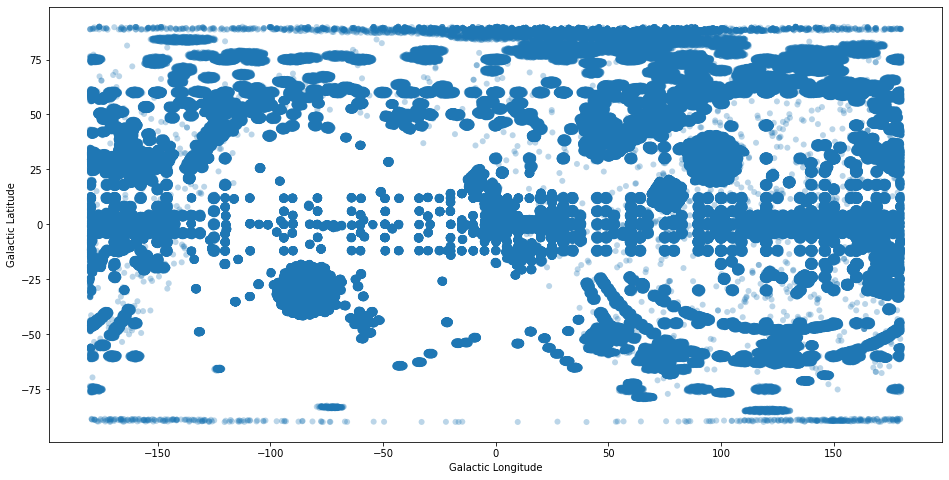

In [8]:
fig =plt.figure(figsize=(16,8))
ax = plt.subplot(111) 

# For pretty plotting, make longitude negative relative to Galactic center.
l_corr_inds = catdata['GLON'] > 180 #indices for GLON correction
l_corr = catdata['GLON'].copy() # just to be safe
l_corr[l_corr_inds] -= 360
ax.scatter(l_corr, catdata['GLAT'], edgecolor='none', alpha=0.3)
ax.set_xlabel('Galactic Longitude')
ax.set_ylabel('Galactic Latitude')

The galactic longitude reported by APOGEE in the GLON field is in the range $[0,360^0]$.

## Need to get rid of engineering and calibratio targets

In [9]:
need_stars = catdata['EXTRATARG'] == 0 # mask to get rid of non-needed targets

In [10]:
mystars = catdata[need_stars]

In [11]:
np.sum(need_stars)

372458

Text(0, 0.5, 'Galactic Latitude')

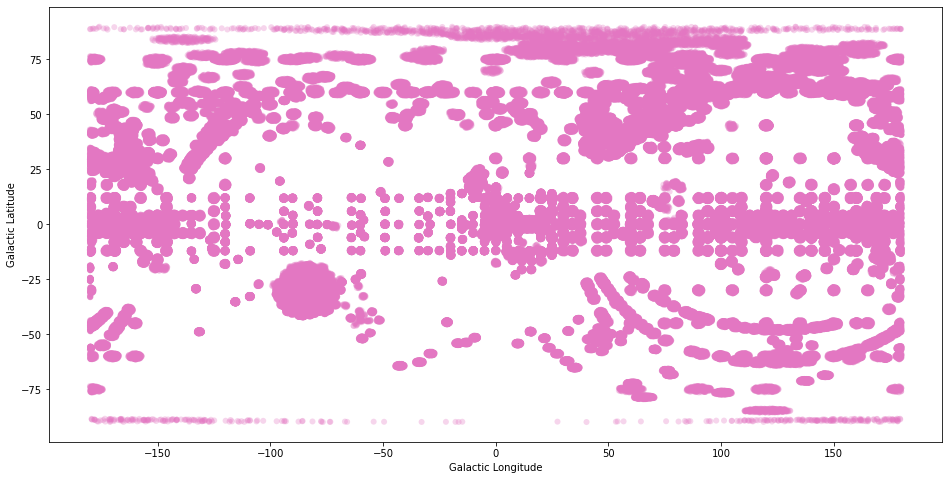

In [12]:
fig =plt.figure(figsize=(16,8))
ax = plt.subplot(111) 

l_corr_inds = mystars['GLON'] > 180 #indices for GLON correction
l_corr = mystars['GLON'].copy() # just to be safe
l_corr[l_corr_inds] -= 360
ax.scatter(l_corr, mystars['GLAT'], edgecolor='none', alpha=0.3, c = 'C6')
ax.set_xlabel('Galactic Longitude')
ax.set_ylabel('Galactic Latitude')

In [13]:
# choose some region on the map
glon_mask = np.logical_or(mystars['GLON'] > 345.0, mystars['GLON'] < 15.0)
glat_in_plane = np.abs(mystars['GLAT']) < 5 # |b| < 5
region_mask = np.logical_and(glon_mask, glat_in_plane)

Text(0, 0.5, 'Galactic Latitude')

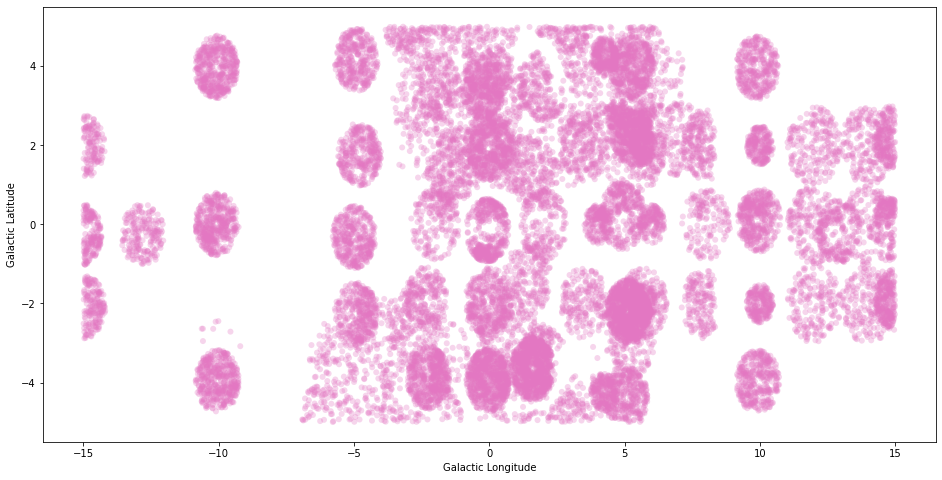

In [14]:
fig =plt.figure(figsize=(16,8))
ax = plt.subplot(111) 

l_corr_inds = mystars['GLON'] > 180 #indices for GLON correction
l_corr = mystars['GLON'].copy() 
l_corr[l_corr_inds] -= 360
ax.scatter(l_corr[region_mask], mystars[region_mask]['GLAT'], edgecolor='none', alpha=0.3, c = 'C6')
ax.set_xlabel('Galactic Longitude')
ax.set_ylabel('Galactic Latitude')

Text(0.5, 1.0, 'Radial Velocities')

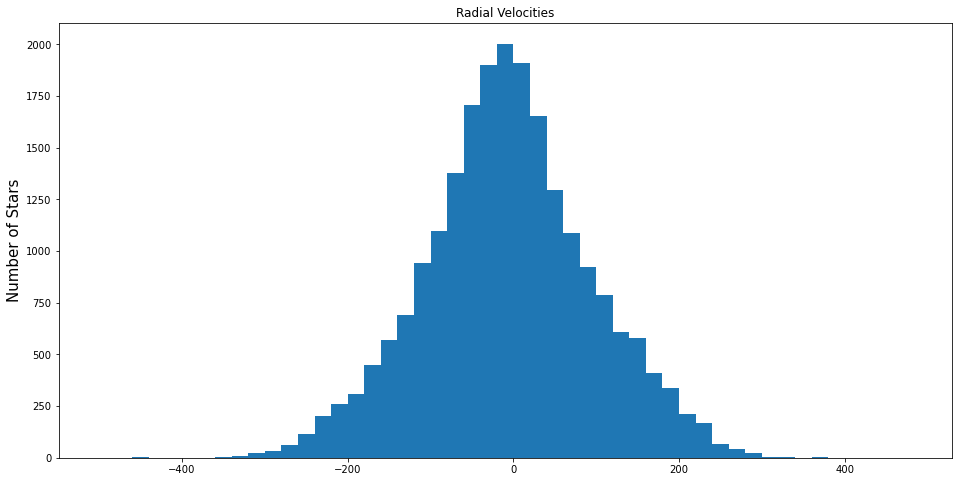

In [15]:
plt.figure(figsize=(16,8)) 
plt.hist(mystars[region_mask]['VHELIO_AVG'], bins = np.arange(-500,500,20))
plt.ylabel('Number of Stars', fontsize=15)
plt.title('Radial Velocities')

a sharp peak at 0 km/s because many stellar orbits are perpendicular to our line of sight when we look towards the Galactic center. 

In [16]:
stars = Table.read(fits_catalog_filename, hdu=1)

In [17]:
stars.columns

<TableColumns names=('APOGEE_ID','TELESCOPE','FIELD','ALT_ID','RA','DEC','GLON','GLAT','J','J_ERR','H','H_ERR','K','K_ERR','AK_TARG','AK_TARG_METHOD','AK_WISE','SFD_EBV','APOGEE_TARGET1','APOGEE_TARGET2','APOGEE2_TARGET1','APOGEE2_TARGET2','APOGEE2_TARGET3','APOGEE2_TARGET4','TARGFLAGS','SURVEY','PROGRAMNAME','NVISITS','SNR','SNREV','STARFLAG','STARFLAGS','ANDFLAG','ANDFLAGS','VHELIO_AVG','VSCATTER','VERR','RV_TEFF','RV_LOGG','RV_FEH','RV_ALPHA','RV_CARB','RV_CHI2','RV_CCFWHM','RV_AUTOFWHM','RV_FLAG','N_COMPONENTS','MEANFIB','SIGFIB','MIN_H','MAX_H','MIN_JK','MAX_JK','GAIAEDR3_SOURCE_ID','GAIAEDR3_PARALLAX','GAIAEDR3_PARALLAX_ERROR','GAIAEDR3_PMRA','GAIAEDR3_PMRA_ERROR','GAIAEDR3_PMDEC','GAIAEDR3_PMDEC_ERROR','GAIAEDR3_PHOT_G_MEAN_MAG','GAIAEDR3_PHOT_BP_MEAN_MAG','GAIAEDR3_PHOT_RP_MEAN_MAG','GAIAEDR3_DR2_RADIAL_VELOCITY','GAIAEDR3_DR2_RADIAL_VELOCITY_ERROR','GAIAEDR3_R_MED_GEO','GAIAEDR3_R_LO_GEO','GAIAEDR3_R_HI_GEO','GAIAEDR3_R_MED_PHOTOGEO','GAIAEDR3_R_LO_PHOTOGEO','GAIAEDR3_R_HI_PHO

# Individual spectra

APOGEE spectra doc: https://www.sdss.org/dr12/irspec/spectra/

In [18]:
hdul_star = fits.open('aspcapStar-dr17-2M17503450-2947317.fits')

In [19]:
hdul_star.info()

Filename: aspcapStar-dr17-2M17503450-2947317.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       5   ()      
  1                1 ImageHDU        11   (8575,)   float64   
  2                1 ImageHDU        11   (8575,)   float64   
  3                1 ImageHDU        11   (8575,)   float64   
  4                1 BinTableHDU    270   1R x 123C   [64A, 30A, 6A, J, 20A, 30A, D, D, D, D, E, E, E, E, E, E, 16A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, J, J, E, E, 16A, E, 32A, E, E, J, J, J, J, J, J, 132A, 32A, 32A, J, J, J, J, E, E, K, 132A, K, 132A, E, E, E, E, E, E, E, E, E, E, E, J, J, E, E, E, E, E, E, K, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 8A, 189E, 21E, 9E, 81E, E, 9E, 81E, 9K, K, 256A, E, E, E, 27E, 27D, 27E, 27E, 27E, 27E, 27E, 27E, 27K]   


In [20]:
hdul_star[3].shape

(8575,)

Info is here: https://data.sdss.org/datamodel/files/APOGEE_ASPCAP/APRED_VERS/ASPCAP_VERS/TELESCOPE/FIELD/aspcapStar.html

In [21]:
flux = hdul_star[1].data # HDU1: Pseudo-continumm normalized flux
model = hdul_star[3].data # HDU3: Best fit model spectrum
error = hdul_star[2].data # HDU2: Spectrum error array
nlambda = hdul_star[1].data.shape[0] # The number of wavelengths

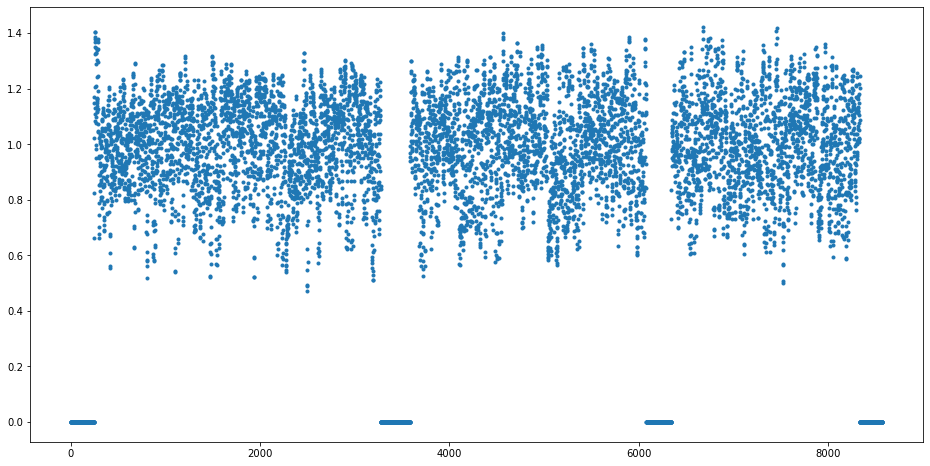

In [22]:
plt.figure(figsize=(16,8))
plt.plot(flux,'.')

In [23]:
hdul_star[1].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    1 / number of array dimensions                     
NAXIS1  =                 8575                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
CRVAL1  =                4.179                                                  
CDELT1  =                6E-06                                                  
CRPIX1  =                    1                                                  
CTYPE1  = 'LOG-LINEAR'                                                          
DC-FLAG =                    1                                                  

In [24]:
start_lambda = hdul_star[1].header['CRVAL1']
disperion = hdul_star[1].header['CDELT1'] # Dispersion (log lambda)
end_lambda = disperion * (nlambda) + start_lambda

In [25]:
nlambda

8575

In [26]:
hdul_star[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
VERSION = '0.17.22 '           / APOGEE software version APOGEE_VER             

In [27]:
loglambda = np.arange(start_lambda,end_lambda,disperion)
linlambda = 10**loglambda  # make the scale linear 

Text(0, 0.5, 'Normalized flux')

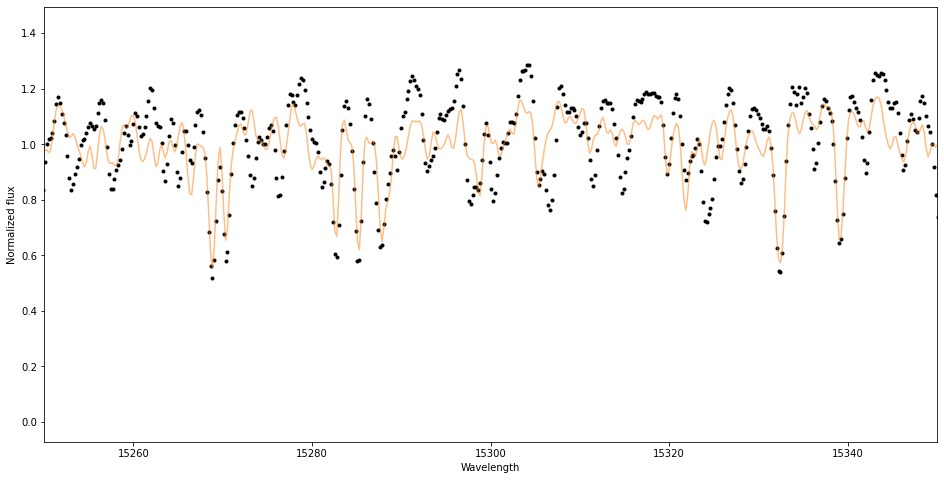

In [28]:
plt.figure(figsize=(16,8))
plt.plot(linlambda,flux, 'k.')
plt.plot(linlambda,model, color='C1', alpha=0.5)
plt.xlim((15250,15350))
plt.xlabel('Wavelength')
plt.ylabel('Normalized flux')

Text(0.5, 0, 'Wavelength')

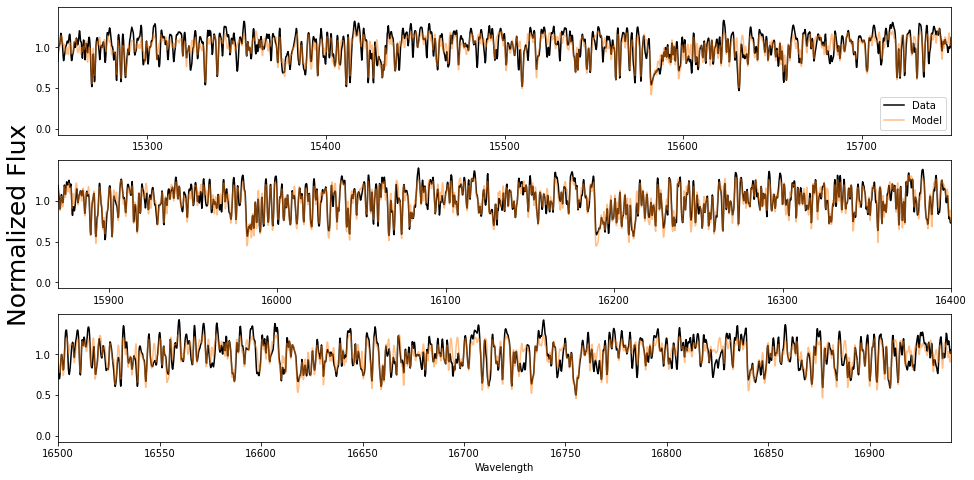

In [29]:
fig,axs = plt.subplots(nrows=3, ncols=1)
fig.set_size_inches((16,8))
axs[0].plot(linlambda, flux, color = 'k', label='Data')
axs[0].plot(linlambda, model, color = 'C1',alpha=0.5, label='Model')
axs[0].set_xlim(15250,15750)
axs[0].legend(loc='lower right')
axs[1].plot(linlambda, flux, color = 'k', label='Data')
axs[1].plot(linlambda, model, color = 'C1',alpha=0.5, label='Model')
axs[1].set_ylabel('Normalized Flux', fontsize=25)
axs[1].set_xlim(15870, 16400)
axs[2].plot(linlambda, flux, color = 'k', label='Data')
axs[2].plot(linlambda, model, color = 'C1',alpha=0.5, label='Model')
axs[2].set_xlim(16500, 16940)
axs[2].set_xlabel('Wavelength')

# Metallicity

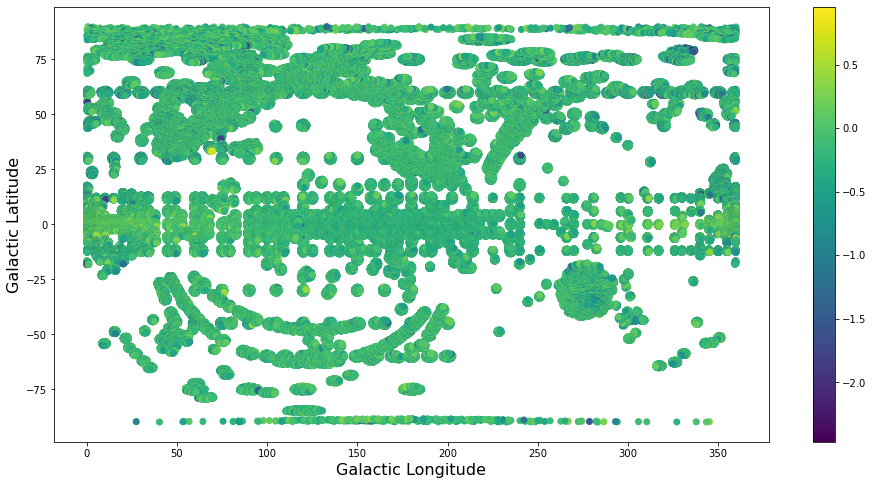

In [34]:
plt.figure(figsize=(16,8))
plt.scatter(mystars['GLON'], mystars['GLAT'], c=mystars['FE_H'])
plt.xlabel('Galactic Longitude', fontsize=16)
plt.ylabel('Galactic Latitude', fontsize=16)
plt.colorbar()

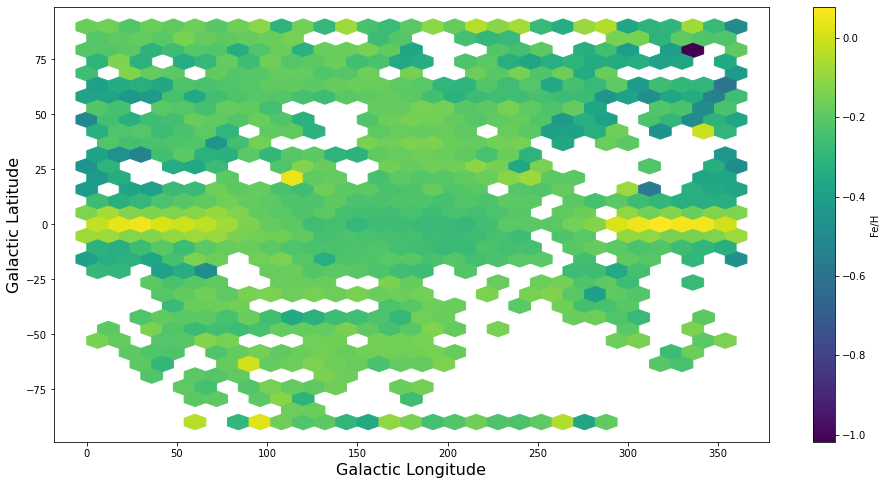

In [38]:
plt.figure(figsize=(16,8))
plt.hexbin(mystars['GLON'], mystars['GLAT'], C=mystars['FE_H'], gridsize=30, mincnt=2)
# hexbin plots mean of 'C' array
plt.xlabel('Galactic Longitude', fontsize=16)
plt.ylabel('Galactic Latitude', fontsize=16)
cb = plt.colorbar(label='Fe/H')